In [8]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype


#t-SNE function

def plot_tsne(X, y, ax, **kwargs):
    y = pd.Series(y) if not isinstance(y, pd.Series) else y
    #Data Type
    if is_numeric_dtype(y) and y.nunique() > 10:
        continuous = True

    else:
        continuous = False


    tsne = TSNE(n_components=2, random_state=0)
    embedding = tsne.fit_transform(X)


    plt.sca(ax)

    #color bar
    if continuous:
        sc = ax.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap="viridis", s=kwargs.get("s",50), alpha=0.7)
        colorbar = plt.colorbar(sc, ax=ax)
        colorbar.set_label("Continuous Value")

    #legend
    else:
        unique_classes = np.unique(y)
        for i, cls in enumerate(unique_classes):
            ax.scatter(embedding[y == cls, 0], embedding[y == cls, 1], label=f"Class{cls}", s=kwargs.get("s",50), alpha=0.7)
        ax.legend(title="Classes", loc="best", fontsize=10)

    #scatter_params = kwargs.get("scatter_params", {})
    #scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], **scatter_params)
 
    if "set_title" in kwargs.keys():
        ax.set_title(kwargs["set_title"]["label"])

    if "set_xlabel" in kwargs.keys():
        ax.set_xlabel(kwargs["set_xlabel"])

    if "set_xlim" in kwargs.keys():
        ax.set_xlim(kwargs["set_xlim"])
        
    if "set_xticks" in kwargs.keys():
        ax.set_xticks(kwargs["set_xticks"])

    if "tick_params" in kwargs.keys():
        ax.tick_params(**kwargs["tick_params"])

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    
    #if kwargs.get("color_bar", False):
     #   colorbar_ax = plt.colorbar(scatter, ax=ax, format='{x:.1f}')
      #  vmin, vmax = np.min(colorbar_ax.get_ticks()), np.max(colorbar_ax.get_ticks())
       # colorbar_ax.mappable.set_clim(vmin=vmin, vmax=vmax)
        #colorbar_ax.set_ticks(ticks = [vmin, vmax], labels=['Low', 'High'], size = 12)
        #colorbar_ax.set_label(label='Feature value', size = 16, labelpad=20, y=0.5)
        #colorbar_ax.outline.set_visible(False)
        #colorbar_ax.ax.tick_params(axis='both', top=False, right=False, bottom=False, left=False)
    

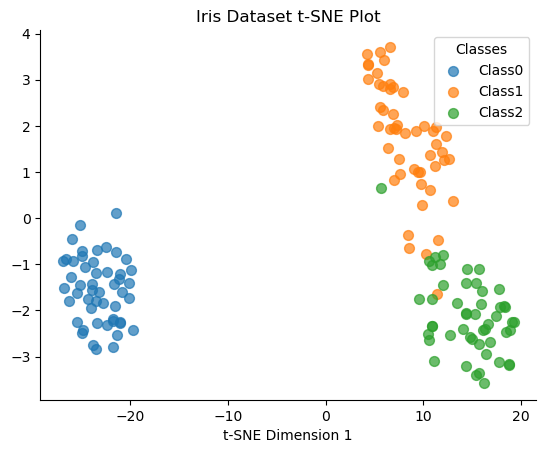

In [12]:
#function example

iris = load_iris()
X = iris.data
y = iris.target

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#tsne = TSNE(n_components=2, perplexity=40, random_state=42)
#tsne_results = tsne.fit_transform(X_scaled)

fig, ax = plt.subplots()
plot_tsne(X, 
          y,
          ax,
          s=50,
          alpha=0.7,
          set_title={'label':"Iris Dataset t-SNE Plot"},
          set_xlabel="t-SNE Dimension 1",
        )

   
plt.show()
